In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

missing_cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'fbs', 'restecg', 'ca', 'slope', 'thal']
heart_disease_data = heart_disease.data.features
heart_disease_data['num'] = heart_disease.data.targets
heart_disease_data = heart_disease_data.dropna(subset=missing_cols)
label_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in label_cols:
    le = LabelEncoder()
    heart_disease_data[col] = le.fit_transform(heart_disease_data[col])
min_max_cols = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
scaler = MinMaxScaler()
heart_disease_data[min_max_cols] = scaler.fit_transform(heart_disease_data[min_max_cols])
outlier_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_mask = iso_forest.fit_predict(heart_disease_data[outlier_cols])
heart_disease_data = heart_disease_data[outlier_mask == 1]

X = heart_disease_data.drop(columns=['num'])
y = heart_disease_data['num']
smote = SMOTE()
X, y = smote.fit_resample(X, y)
heart_disease_data = pd.concat([X, y], axis=1)
outlier_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_mask = iso_forest.fit_predict(heart_disease_data[outlier_cols])
heart_disease_data = heart_disease_data[outlier_mask == 1]
X = heart_disease_data.drop(columns=['num'])
y = heart_disease_data['num']
print(X)
print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)
y_pred = et_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


<ipython-input-8-6d2598a31cd8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data[col] = le.fit_transform(heart_disease_data[col])
<ipython-input-8-6d2598a31cd8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data[col] = le.fit_transform(heart_disease_data[col])
<ipython-input-8-6d2598a31cd8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
1    0.791667    1  1.000000  0.245283  0.235160    0      1.0  0.442748   
2    0.250000    0  0.333333  0.339623  0.178082    0      1.0  0.770992   
3    0.562500    1  0.333333  0.245283  0.251142    0      0.0  0.816794   
4    0.583333    0  1.000000  0.245283  0.520548    0      0.0  0.702290   
5    0.708333    1  1.000000  0.339623  0.292237    0      1.0  0.580153   
..        ...  ...       ...       ...       ...  ...      ...       ...   
765  0.625158    1  1.000000  0.559629  0.293865    0      1.0  0.520697   
766  0.743566    0  1.000000  0.513735  0.216862    0      1.0  0.370677   
767  0.629717    0  1.000000  0.528302  0.241845    0      1.0  0.369379   
768  0.534678    1  0.805643  0.319277  0.249818    0      1.0  0.599799   
769  0.524827    1  1.000000  0.514179  0.245932    0      1.0  0.444257   

     exang   oldpeak  slope        ca      thal  
1        1  0.419355    0.5  0.666667

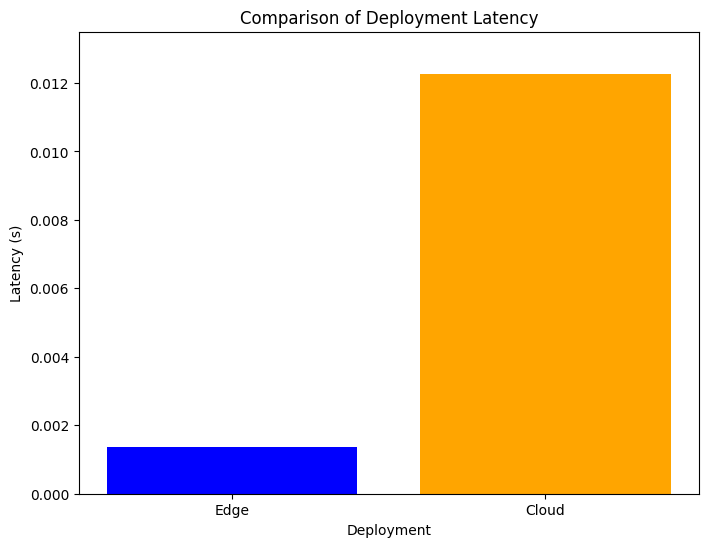

In [ ]:
import matplotlib.pyplot as plt

deployment = ['Edge', 'Cloud']
latency = [0.001358, 0.012269]

plt.figure(figsize=(8, 6))
plt.bar(deployment, latency, color=['blue', 'orange'])

plt.xlabel('Deployment')
plt.ylabel('Latency (s)')
plt.title('Comparison of Deployment Latency')
plt.ylim(0, max(latency) * 1.1)

plt.show()


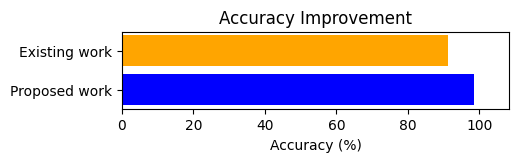

In [ ]:
import matplotlib.pyplot as plt

# Data
# deployment = ['Edge', 'Cloud']
# latency = [0.001358, 0.012269]
deployment = ['Proposed work', 'Existing work']
latency = [98.55, 91.34]


# Plotting
plt.figure(figsize=(5, 1))
plt.barh(deployment, latency, color=['blue', 'orange'])

# plt.xlabel('Deployment')
# plt.ylabel('Latency (s)')
# plt.title('Latency')
# plt.xlabel('Deployment')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy Improvement')
plt.xlim(0, max(latency) * 1.1)

# Display the plot
plt.show()


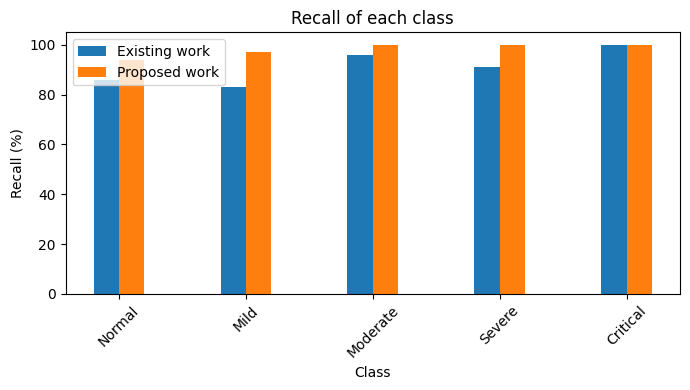

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


model1_recall = [86, 83, 96, 91, 100]

model2_recall = [94, 97, 100, 100, 100]

classes = ['Normal', 'Mild', 'Moderate', 'Severe', 'Critical']

bar_width = 0.2

x = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(7, 4))


bars1 = ax.bar(x - bar_width/2, model1_recall, bar_width, label='Existing work ')
bars2 = ax.bar(x + bar_width/2, model2_recall, bar_width, label='Proposed work')

ax.set_xlabel('Class')
ax.set_ylabel('Recall (%)')
ax.set_title('Recall of each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


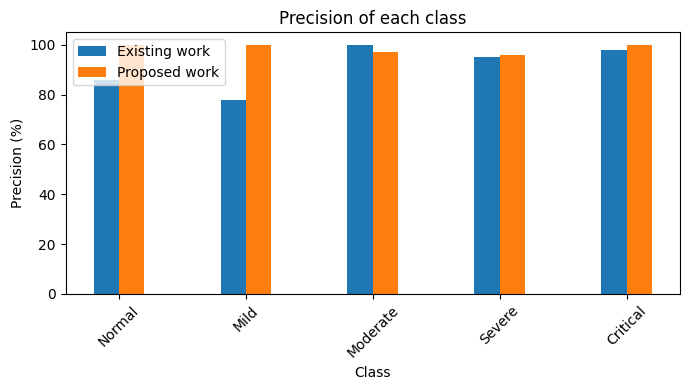

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


model1_precision = [86, 78, 100, 95, 98]

model2_precision = [100, 100, 97, 96, 100]

classes = ['Normal', 'Mild', 'Moderate', 'Severe', 'Critical']

bar_width = 0.2

x = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(7, 4))


bars1 = ax.bar(x - bar_width/2, model1_precision, bar_width, label='Existing work ')
bars2 = ax.bar(x + bar_width/2, model2_precision, bar_width, label='Proposed work')

ax.set_xlabel('Class')
ax.set_ylabel('Precision (%)')
ax.set_title('Precision of each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


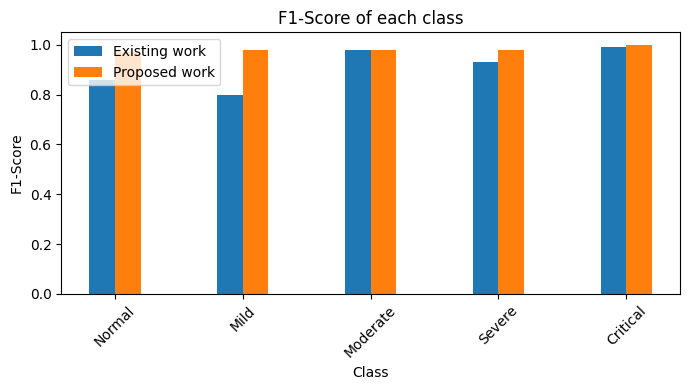

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model1_f1_score = [0.86, 0.80, 0.98, 0.93, 0.99]

model2_f1_score = [0.97, 0.98, 0.98, 0.98, 1.00]

classes = ['Normal', 'Mild', 'Moderate', 'Severe', 'Critical']

bar_width = 0.2

x = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(7, 4))


bars1 = ax.bar(x - bar_width/2, model1_f1_score, bar_width, label='Existing work ')
bars2 = ax.bar(x + bar_width/2, model2_f1_score, bar_width, label='Proposed work')

ax.set_xlabel('Class')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score of each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


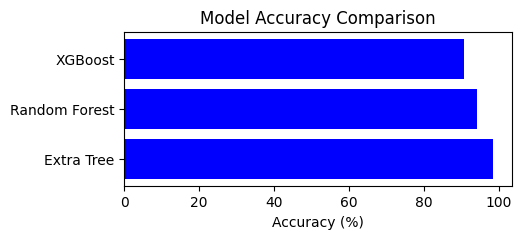

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Extra Tree','Random Forest','XGBoost']
accuracy = [ 98.55, 94.2, 90.57]

# Plotting
plt.figure(figsize=(5, 2))  # Adjust the figure size as needed
plt.barh(models, accuracy, color='blue')

# Add labels and title
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()


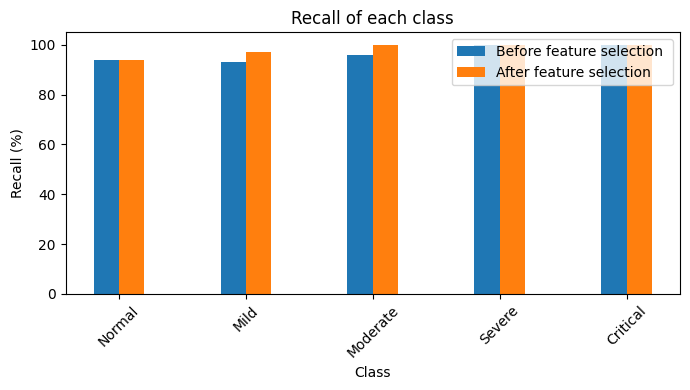

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# model1_accuracy = [90.86]
model1_recall = [94, 93, 96, 100, 100]
# model1_precision = [100, 100, 93, 93, 100]
# model1_f1_score = [0.88, 0.84, 0.97, 0.90, 0.98]


# model2_accuracy = [98.55, 97, 100, 100, 100]
model2_recall = [94, 97, 100, 100, 100]
# model2_precision = [100, 100, 97, 96, 100]
# model2_f1_score = [0.97, 0.98, 0.98, 0.98, 1.00]

# Categories (class labels)
classes = ['Normal', 'Mild', 'Moderate', 'Severe', 'Critical']

# Bar width
bar_width = 0.2

# X-axis positions for the bars
x = np.arange(len(classes))

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Bar for model 1
bars1 = ax.bar(x - bar_width/2, model1_recall, bar_width, label='Before feature selection ')
bars2 = ax.bar(x + bar_width/2, model2_recall, bar_width, label='After feature selection')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Recall (%)')
ax.set_title('Recall of each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
